<a href="https://colab.research.google.com/github/hjww00/Data-Analysis-with-Open-Source/blob/main/%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
import json
import pandas

total_contents = []
api_key = "62784b5366776b6f3130324d576a5846";
years = ["2015","2016","2017","2018","2019","2020","2021","2022","2023","2024"]
months = ["01","02","03","04","05","06","07","08","09","10","11","12"]
for year in years:
    for month in months:
        url = f'http://openapi.seoul.go.kr:8088/{api_key}/json/energyUseDataSummaryInfo/1/5/{year}/{month}';
        response = requests.get(url)
        #json으로 변환 저장
        json_content = json.loads(response.content)
        #print(json_content)
        total_contents.append(json_content)

print(total_contents)


[{'energyUseDataSummaryInfo': {'list_total_count': 7, 'RESULT': {'CODE': 'INFO-000', 'MESSAGE': '정상 처리되었습니다'}, 'row': [{'YEAR': '2015', 'MON': '01', 'MM_TYPE': '개인', 'CNT': '767791', 'EUS': '193784708', 'EUS1': '194781915', 'EUS2': '204969429', 'ECO2_1': '-6090964', 'ECO2_2': '-2582568.736', 'GUS': '59133720', 'GUS1': '57163993', 'GUS2': '68297619', 'GCO2_1': '-3597086', 'GCO2_2': '-8057472.64', 'WUS': '12819757.886', 'WUS1': '12723680.426', 'WUS2': '12899476.73', 'WCO2_1': '8179.308', 'WCO2_2': '2715.530256', 'HUS': '22740838.937', 'HUS1': '23400055.303', 'HUS2': '27090493.875', 'HCO2_1': '-2504435.652', 'HCO2_2': '-33660084.213069', 'REG_DATE': '2015-06-04 17:03:55.0'}, {'YEAR': '2015', 'MON': '01', 'MM_TYPE': '학교', 'CNT': '1382', 'EUS': '134955565', 'EUS1': '128707423', 'EUS2': '145561511', 'ECO2_1': '-2178902', 'ECO2_2': '-923854.448', 'GUS': '9107197', 'GUS1': '8410968', 'GUS2': '10745416', 'GCO2_1': '-470995', 'GCO2_2': '-1055028.8', 'WUS': '2075819.2', 'WUS1': '2097433.8', 'WUS2

In [2]:
import pandas

data = []
for content in total_contents:
    data.append(content['energyUseDataSummaryInfo']['row'][0])

df = pandas.DataFrame(data)
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 25 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   YEAR      120 non-null    object
 1   MON       120 non-null    object
 2   MM_TYPE   120 non-null    object
 3   CNT       120 non-null    object
 4   EUS       120 non-null    object
 5   EUS1      120 non-null    object
 6   EUS2      120 non-null    object
 7   ECO2_1    120 non-null    object
 8   ECO2_2    120 non-null    object
 9   GUS       120 non-null    object
 10  GUS1      120 non-null    object
 11  GUS2      120 non-null    object
 12  GCO2_1    120 non-null    object
 13  GCO2_2    120 non-null    object
 14  WUS       120 non-null    object
 15  WUS1      120 non-null    object
 16  WUS2      120 non-null    object
 17  WCO2_1    120 non-null    object
 18  WCO2_2    120 non-null    object
 19  HUS       120 non-null    object
 20  HUS1      120 non-null    object
 21  HUS2      120 no

In [3]:
df.rename(columns={'YEAR' : '연도'}, inplace=True)

seoson = {
    "봄" : {"03", "04", "05"},
    "여름" : {"06", "07", "08"},
    "가을" : {"09", "10", "11"},
    "겨울" : {"12", "01", "02"},
}

def set_seoson(month) :
    for seoson_char, months in seoson.items():
        if month in months:
            return seoson_char;

df['계절'] = df['MON'].apply(set_seoson)
display(df)

,연도,MON,MM_TYPE,CNT,EUS,EUS1,EUS2,ECO2_1,ECO2_2,GUS,...,WUS2,WCO2_1,WCO2_2,HUS,HUS1,HUS2,HCO2_1,HCO2_2,REG_DATE,계절
0,2015,01,개인,767791,193784708,194781915,204969429,-6090964,-2582568.736,59133720,...,12899476.73,8179.308,2715.530256,22740838.937,23400055.303,27090493.875,-2504435.652,-33660084.213069,2015-06-04 17:03:55.0,겨울
1,2015,02,개인,774620,189974230,193611430,200055533,-6859251.5,-2908322.636,56487358,...,12948410.081,-173889.9085,-57731.449622,18793320.213,19032221.757,21414367.325,-1429974.328,-17311712.76832,2015-06-04 16:59:30.0,겨울
2,2015,03,학교,3903,145577747,140333207,148915260,673170,285424.08,7601585,...,2793577,-137612.4,-45687.3168,48,34,41,10.5,41.811,2015-06-12 04:00:01.0,봄
3,2015,04,학교,4021,134199179,130280899,148944597,-5413569,-2295353.256,5544226,...,3150480,-106328.8,-35301.1616,9,8,16,-3,-11.946,2015-07-05 04:00:00.0,봄
4,2015,05,개인,810422,177289769,181972266,188230004,-7811366,-3312019.184,22060892,...,13186433.49,-113657.49,-37734.28668,1320895.801,1558697.648,1709192.194,-313049.12,-5190153.166471,2015-08-05 04:00:01.0,봄
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2024,08,종교단체,847,9717678,9362542,8951131,560841.5,560841.5,176486,...,57227,1437.5,4312.5,0,0,0,0,0,2024-11-01 04:04:00.0,여름
116,2024,09,기업,19450,742787183,713886345,683362396,44162812.5,44162812.5,22085380,...,5340886,214271.2,642813.6,0,0,0,0,0,2024-12-01 04:02:35.0,가을
117,2024,10,개인,1249966,282268119,264132620,263389786,18506916,14379201.216,8233421,...,15520212.2,-148610.9,-189025.694,2695491.396,3326775.236,4339830.387,-1137811.4155,-1573249.33785276,2025-01-01 04:02:38.0,가을
118,2024,11,공공기관,2456,141281942,145555106,141150651,-2070936.5,-2070936.5,1070872,...,1117201.2,115454.4,346363.2,0,0,0,0,0,2025-02-01 04:02:31.0,가을


In [13]:
pandas.set_option('display.float_format', '{:,.0f}'.format)

df[['EUS', 'GUS', 'WUS', 'HUS']].info()
display(df[['EUS', 'GUS', 'WUS', 'HUS']])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   EUS     120 non-null    int64  
 1   GUS     120 non-null    int64  
 2   WUS     120 non-null    float64
 3   HUS     120 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 3.9 KB


,EUS,GUS,WUS,HUS
0,193784708,59133720,"12,819,758","22,740,839"
1,189974230,56487358,"12,656,888","18,793,320"
2,145577747,7601585,"2,570,266",48
3,134199179,5544226,"3,003,916",9
4,177289769,22060892,"13,086,734","1,320,896"
...,...,...,...,...
115,9717678,176486,"58,929",0
116,742787183,22085380,"5,586,965",0
117,282268119,8233421,"15,297,670","2,695,491"
118,141281942,1070872,"1,298,952",0


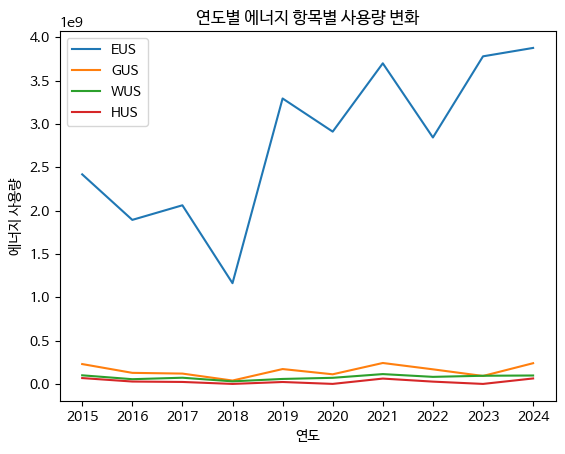

In [7]:
import matplotlib.pyplot as plt

df['EUS']= pandas.to_numeric( df['EUS'])
df['GUS']= pandas.to_numeric( df['GUS'])
df['WUS']= pandas.to_numeric( df['WUS'])
df['HUS']= pandas.to_numeric( df['HUS'])

df_energy_types_yearly = df.groupby('연도')[['EUS', 'GUS', 'WUS', 'HUS']].aggregate(['sum'])

plt.plot(df_energy_types_yearly.index, df_energy_types_yearly[('EUS', 'sum')], label='EUS')
plt.plot(df_energy_types_yearly.index, df_energy_types_yearly[('GUS', 'sum')], label='GUS')
plt.plot(df_energy_types_yearly.index, df_energy_types_yearly[('WUS', 'sum')], label='WUS')
plt.plot(df_energy_types_yearly.index, df_energy_types_yearly[('HUS', 'sum')], label='HUS')
plt.title("연도별 에너지 항목별 사용량 변화")
plt.xlabel('연도')
plt.ylabel('에너지 사용량')
plt.legend()

plt.show()

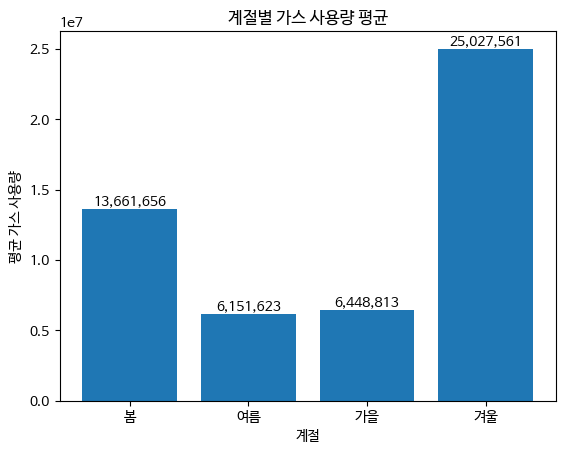

In [5]:
df_gas_energy = df.groupby('계절')['GUS'].aggregate(['mean'])

season_order = ['봄', '여름', '가을', '겨울']
df_gas_energy = df_gas_energy.reindex(season_order)

plt.bar(df_gas_energy.index, df_gas_energy['mean'])
plt.title("계절별 가스 사용량 평균")
plt.xlabel("계절")
plt.ylabel("평균 가스 사용량")

for index, value in enumerate(df_gas_energy['mean']):
    plt.text(index, value, f'{value:,.0f}', ha='center', va='bottom')
plt.show()

In [6]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm -rf ~/.cache/matplotlib


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/